# Regression with KNeighbors

## Load Datasets

In [23]:
import numpy as np

In [24]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## Visualize Datasets

In [25]:
import matplotlib.pyplot as plt

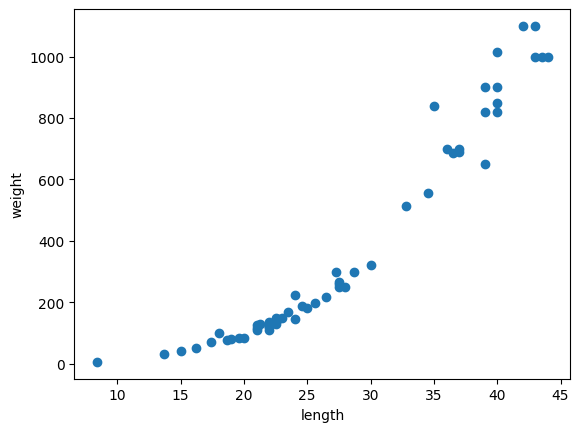

In [26]:
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## Seperate train data, test data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

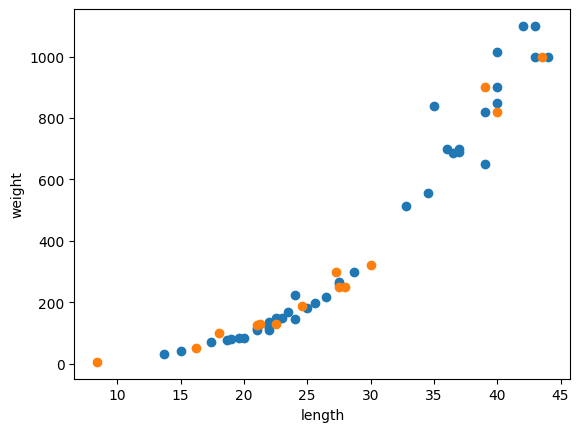

In [29]:
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## Reshape to satisfy model's input

In [30]:
train_input = train_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

In [31]:
train_input.shape, test_input.shape

((42, 1), (14, 1))

## Train

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [34]:
knr.score(test_input, test_target)

0.992809406101064

## Test

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

mae

19.157142857142862

### Score fitness

In [37]:
knr.score(train_input, train_target), knr.score(test_input, test_target)

(0.9698823289099254, 0.992809406101064)

The model's test score is bigger than train score, which means it's under fitting since the model is too simple.

## Visualize

In [38]:
x_arr = np.arange(0, 45.0, step=0.5).reshape(-1, 1)

y_arr_pred = knr.predict(x_arr)

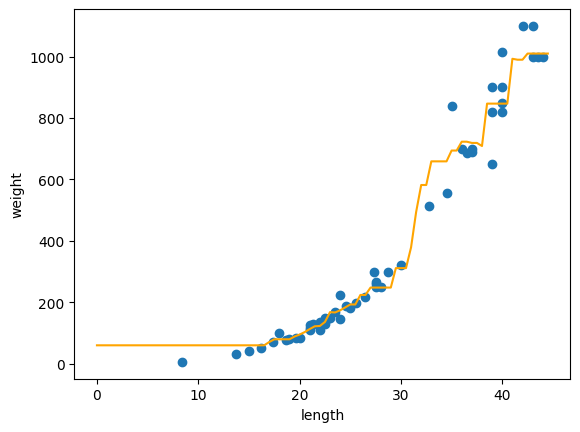

In [39]:
plt.scatter(perch_length, perch_weight)
plt.plot(x_arr, y_arr_pred, color="orange")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## Remodel

In [40]:
knr.n_neighbors = 3 # Initial value : 5

In [41]:
knr.fit(train_input, train_target)

knr.score(train_input, train_target), knr.score(test_input, test_target)

(0.9804899950518966, 0.9746459963987609)

Now, model's train score is bigger than test score.

This could mean slight overfitting, but still admittable.

## Visualize

In [42]:
x_arr = np.arange(0, 45.0, step=0.5).reshape(-1, 1)

y_arr_pred = knr.predict(x_arr)

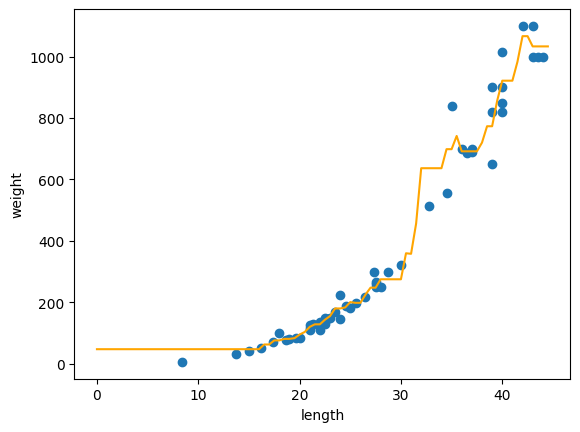

In [43]:
plt.scatter(perch_length, perch_weight)
plt.plot(x_arr, y_arr_pred, color="orange")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

## Visualizing with various k-numbers

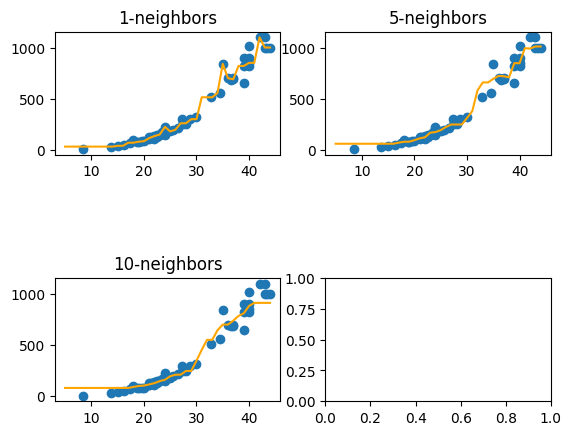

In [44]:
knr = KNeighborsRegressor()

x = np.arange(5, 45, step=1).reshape(-1, 1)

fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=1)

for idx, n in enumerate([1, 5, 10]):
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  ax[idx // 2][idx % 2].scatter(perch_length, perch_weight)
  ax[idx // 2][idx % 2].plot(x, prediction, color="orange")
  ax[idx // 2][idx % 2].set_title(f"{n}-neighbors")

plt.show()

# Linear Regerssion

In [45]:
import numpy as np

In [46]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [49]:
import matplotlib.pyplot as plt

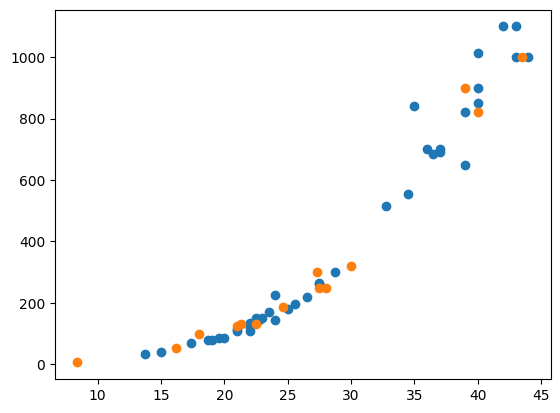

In [50]:
fig, ax = plt.subplots(1, 1)
ax.scatter(train_input, train_target)
ax.scatter(test_input, test_target)
fig.show()

## Reshape

In [51]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_target = train_target.reshape(-1, 1)
test_target = test_target.reshape(-1, 1)

## K-Neariest Neighbors 알고리즘의 한계

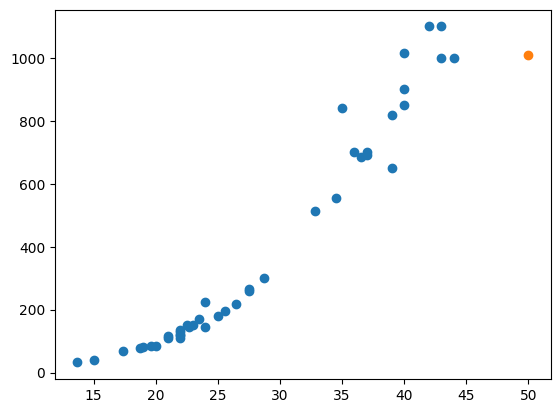

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

plt.scatter(train_input, train_target)
plt.scatter([50], knr.predict([[50], ]))
plt.show()

train 데이터를 벗어나면 정확한 예측이 불가능함.

## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

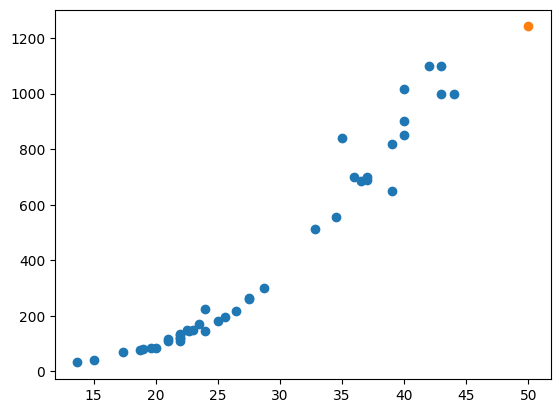

In [54]:
plt.scatter(train_input, train_target)
plt.scatter([50], lr.predict([[50], ]))
plt.show()

In [58]:
lr.coef_, lr.intercept_

(array([[39.01714496]]), array([-709.01864495]))

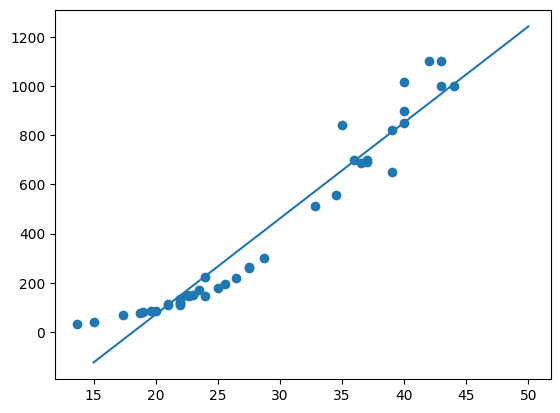

In [59]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [
    lr.coef_[0][0] * 15 + lr.intercept_[0],
    lr.coef_[0][0] * 50 + lr.intercept_[0]
])
plt.show()

In [60]:
lr.score(train_input, train_target), lr.score(test_input, test_target)

(0.939846333997604, 0.8247503123313558)

The data looks like square form, but I used 'linear' regression.

There exist inevitable error between train datas and test datas.

We need to add another column in train, test data's row.

In [62]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [63]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

LinearRegression()

In [64]:
lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.9706807451768623, 0.9775935108325122)

In [66]:
lr.coef_, lr.intercept_

(array([[  1.01433211, -21.55792498]]), array([116.05021078]))

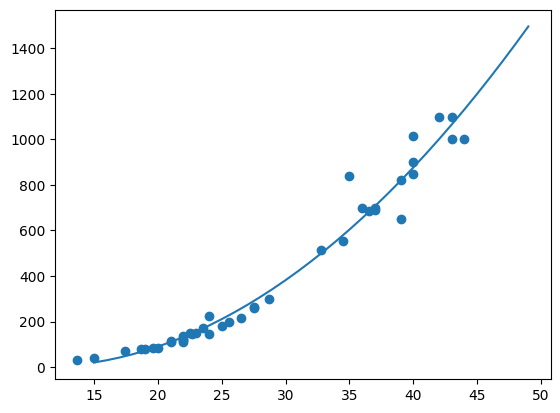

In [69]:
plt.scatter(train_input, train_target)
x = np.arange(15, 50, step=1)
plt.plot(x, lr.coef_[0][0] * x ** 2 + lr.coef_[0][1] * x + lr.intercept_[0])
plt.show()

# Multiple regression

In [78]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [79]:
import numpy as np

In [80]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [81]:
from sklearn.model_selection import train_test_split

In [83]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [89]:
train_input.shape, test_input.shape

((42, 3), (14, 3))

데이터의 열을 섞으면서 여러 특성을 창출해낸다.

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


```python
[[2^0*3^0, 2^1*3^0, ...]]
```

In [92]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [94]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [95]:
test_poly = poly.transform(test_input)

현재 degree = 2임. (차수 : 1 ~ 2)


In [96]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [97]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

LinearRegression()

In [99]:
lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.9903183436982125, 0.9714559911594111)

degree = 5까지 늘린다.

In [101]:
poly = PolynomialFeatures(degree=5, include_bias = False)
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [103]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2',
       'length^3', 'length^2  height', 'length^2  width',
       'length  height^2', 'length  height  width', 'length  width^2',
       ' height^3', ' height^2  width', ' height  width^2', ' width^3',
       'length^4', 'length^3  height', 'length^3  width',
       'length^2  height^2', 'length^2  height  width',
       'length^2  width^2', 'length  height^3', 'length  height^2  width',
       'length  height  width^2', 'length  width^3', ' height^4',
       ' height^3  width', ' height^2  width^2', ' height  width^3',
       ' width^4', 'length^5', 'length^4  height', 'length^4  width',
       'length^3  height^2', 'length^3  height  width',
       'length^3  width^2', 'length^2  height^3',
       'length^2  height^2  width', 'length^2  height  width^2',
       'length^2  width^3', 'length  height^4', 'length  height^3  width',
       'length  height^2

In [106]:
lr = LinearRegression()

lr.fit(train_poly, train_target)

LinearRegression()

In [107]:
lr.score(train_poly, train_target), lr.score(test_poly, test_target)

(0.9999999999996433, -144.40579436844948)

-144를 보면 심각한 overfitting임을 알 수 있다.

즉, 특성이 너무 많다고 좋은 것이 아님... (pdf참고)

## Normalize 한다.

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 규제 모델을 활용한다.

### Ridge model

In [111]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [112]:
ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9896101671037343, 0.9790693977615387)

degree = 5임에도 테스트 정확도가 잘 나온다.


In [115]:
train_score = []
test_score = []
alpha_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha, max_iter=10000)
  ridge.fit(train_scaled, train_target)
  train_score.append(
      ridge.score(train_scaled, train_target)
  )
  test_score.append(
      ridge.score(test_scaled, test_target)
  )

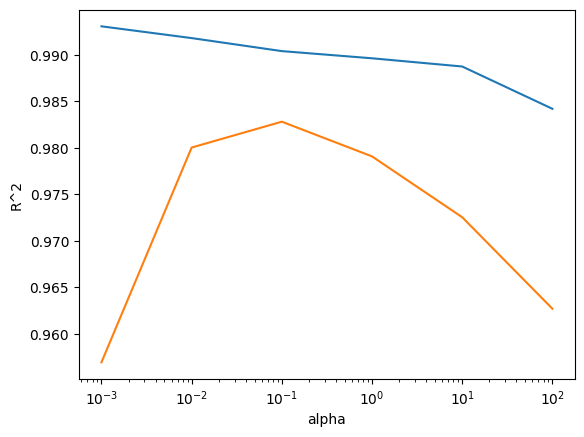

In [116]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [123]:
ridge = Ridge(alpha=1e-1)
ridge.fit(train_scaled, train_target)

ridge.score(train_scaled, train_target), ridge.score(test_scaled, test_target)

(0.9903815817570367, 0.9827976465386928)

가장 좋은 알파값에서 가장 높은 테스트 정확도가 나온다.

### Lasso model

In [118]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [119]:
lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.989789897208096, 0.9800593698421883)

In [120]:
train_score = []
test_score = []
alpha_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(
      lasso.score(train_scaled, train_target)
  )
  test_score.append(
      lasso.score(test_scaled, test_target)
  )

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


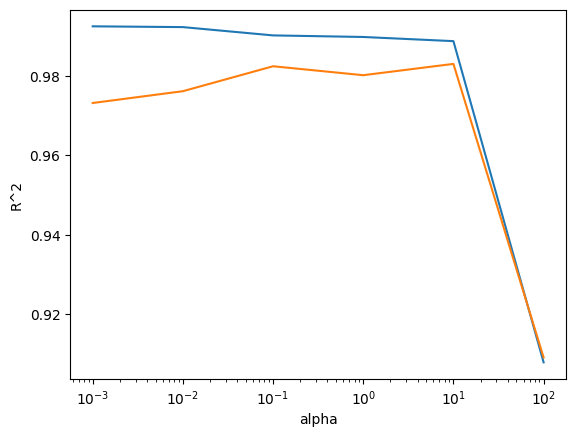

In [121]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("R^2")
plt.show()

In [124]:
lasso = Lasso(alpha=1e1)
lasso.fit(train_scaled, train_target)

lasso.score(train_scaled, train_target), lasso.score(test_scaled, test_target)

(0.9888067471131867, 0.9824470598706695)